# Survival analysis using Kaplan Meier model for full data

## Read data

In [2]:
import os

from pathlib import Path

import pandas as pd


journeysDf = pd.read_csv(Path(os.environ['EHR_DATA_BASE'], 'data', 'full_cohort', 'journry_times.csv'))
journeysDf

,person_id,JOURNEY_ID,admittime_adm,deathtime_adm
0,2133327,567916,26/11/2018,NaN
1,2197822,572108,16/04/2019,17/07/2019
2,2138701,565491,12/11/2018,14/12/2021
3,330958,584875,02/03/2019,NaN
4,2189657,10719842,11/01/2019,NaN
...,...,...,...,...
6110,1855200,17748547,25/05/2023,NaN
6111,2240165,17881084,12/07/2023,29/07/2023
6112,2240165,17882738,12/07/2023,29/07/2023
6113,2514680,17883870,03/07/2023,NaN


## Getting data in the right format

In [3]:
from lifelines.utils import datetimes_to_durations

# start_times is a vector or list of datetime objects or datetime strings
# end_times is a vector or list of (possibly missing) datetime objects or datetime strings
T, E = datetimes_to_durations(journeysDf.admittime_adm, journeysDf.deathtime_adm, freq='D')

/home/vmadmin/workspace/alfred-data-analysis/.venv/lib/python3.10/site-packages/lifelines/utils/__init__.py:684: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  start_times_ = pd.to_datetime(start_times, dayfirst=dayfirst, format=format)
/home/vmadmin/workspace/alfred-data-analysis/.venv/lib/python3.10/site-packages/lifelines/utils/__init__.py:693: UserWarning: Warning: some values of start_times are after end_times.

  warnings.warn("Warning: some values of start_times are after end_times.\n", UserWarning)


In [14]:
journeysDf['T'] = T
journeysDf['E'] = E

## Explore formatted data

<Axes: xlabel='T', ylabel='Count'>

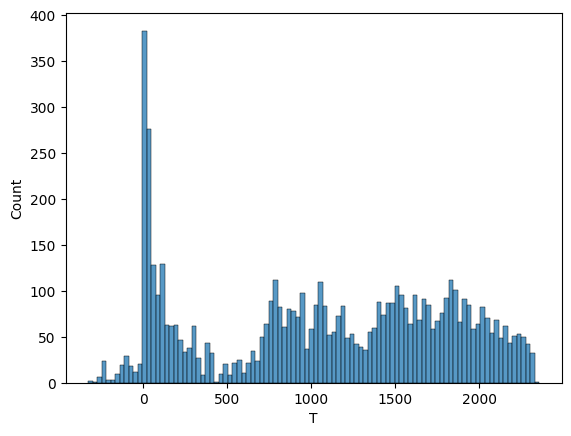

In [21]:
import seaborn as sns


sns.histplot(data=journeysDf['T'], bins=100)

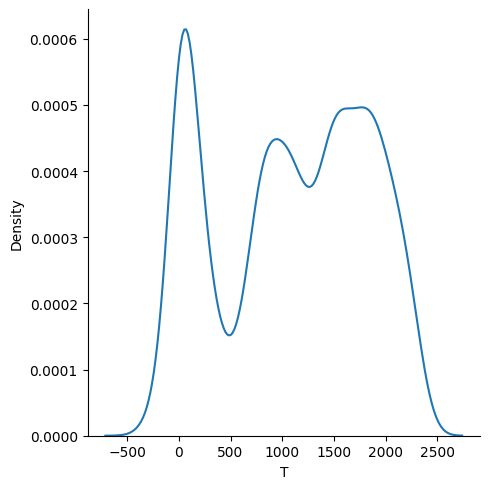

In [18]:
import seaborn as sns


sns.displot(data=journeysDf, x='T', kind="kde")

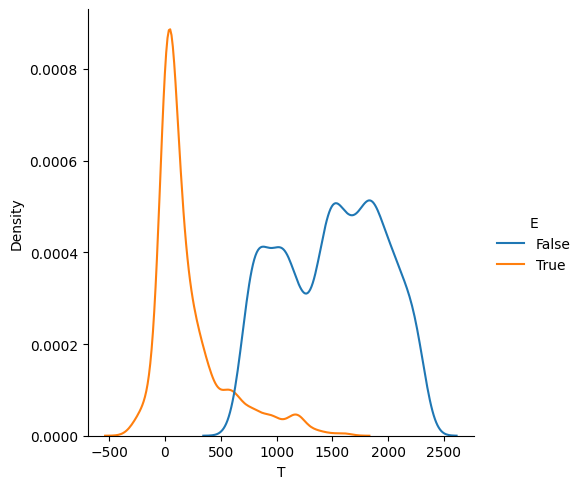

In [17]:
import seaborn as sns


sns.displot(data=journeysDf, x='T', hue='E', kind="kde")

## Create analysis data

As some of the death times are before the journey start time, we need to remove them from further analysis

In [34]:
sum(journeysDf['T'] < 0)

151

In [35]:
analysisDf = journeysDf[journeysDf['T'] >= 0]
analysisDf

,person_id,JOURNEY_ID,admittime_adm,deathtime_adm,T,E
0,2133327,567916,26/11/2018,NaN,2290.0,False
1,2197822,572108,16/04/2019,17/07/2019,92.0,True
2,2138701,565491,12/11/2018,14/12/2021,1128.0,True
3,330958,584875,02/03/2019,NaN,2194.0,False
4,2189657,10719842,11/01/2019,NaN,2244.0,False
...,...,...,...,...,...,...
6110,1855200,17748547,25/05/2023,NaN,649.0,False
6111,2240165,17881084,12/07/2023,29/07/2023,17.0,True
6112,2240165,17882738,12/07/2023,29/07/2023,17.0,True
6113,2514680,17883870,03/07/2023,NaN,610.0,False


## Kaplan Meier Survival Analysis

In [36]:
from lifelines import KaplanMeierFitter


kmf = KaplanMeierFitter()
kmf.fit(analysisDf['T'], event_observed=analysisDf['E'])  # or, more succinctly, kmf.fit(T, E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 5964 total observations, 4149 right-censored observations>

<Axes: xlabel='timeline'>

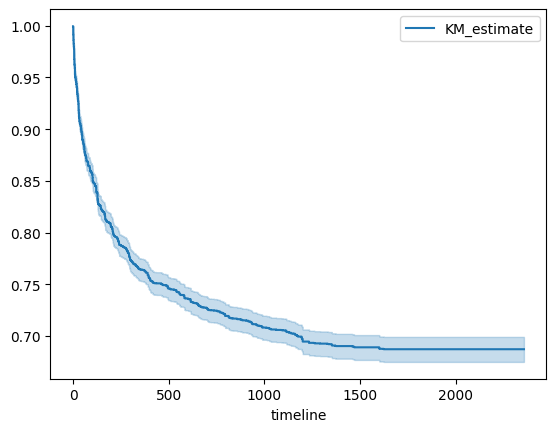

In [37]:
kmf.plot_survival_function()